![ds4a_colombia.svg](attachment:images/ds4a_colombia.svg)

# Impacto de la deforestación en el regimen de caudales de los rios en Colombia (TEAM 28)

## Multivariate time series forecasting

### Libraries

In [104]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

### Read data

In [3]:
macrodata = pd.read_csv('../data/matrix/matrix_consol.zip')

macrodata.head(10)

date  year  month  mc  v_flow_mean  v_loss_cover  v_rainfall_total  \
0  2000-01  2000      1   1        1.940      0.000000        343.527950   
1  2000-02  2000      2   1        1.500      0.000552        264.722268   
2  2000-03  2000      3   1        1.720      0.001105        170.728482   
3  2000-04  2000      4   1        2.160      0.001657         63.436557   
4  2000-05  2000      5   1        4.410      0.002210         73.772848   
5  2000-06  2000      6   1        2.545      0.002762         42.536823   
6  2000-07  2000      7   1        2.720      0.003314         52.253772   
7  2000-08  2000      8   1        4.030      0.003867         21.126886   
8  2000-09  2000      9   1        2.730      0.004419         92.401064   
9  2000-10  2000     10   1        1.940      0.004972        149.583849   

   v_temperature_mean  
0              18.300  
1              18.200  
2              18.500  
3              18.700  
4              18.400  
5              18.875  
6              18.800  
7              19.600  
8              18.650  
9              18.300

In [4]:
macrodata.tail(10)

date  year  month  mc  v_flow_mean  v_loss_cover  v_rainfall_total  \
11510  2019-03  2019      3  48   604.200000      0.061990          176.3406   
11511  2019-04  2019      4  48  1020.375000      0.062471          288.9352   
11512  2019-05  2019      5  48  3315.827375      0.062953          341.7994   
11513  2019-06  2019      6  48  7063.004250      0.063434          607.1004   
11514  2019-07  2019      7  48  8491.451625      0.063916          303.0787   
11515  2019-08  2019      8  48  8772.352875      0.064397          186.4547   
11516  2019-09  2019      9  48  7051.413625      0.064878          173.6202   
11517  2019-10  2019     10  48  5164.225750      0.065360          291.4107   
11518  2019-11  2019     11  48  3775.500000      0.065841          258.8228   
11519  2019-12  2019     12  48  2736.000000      0.066323          110.3883   

       v_temperature_mean  
11510                 NaN  
11511                 NaN  
11512                 NaN  
11513                 NaN  
11514                 NaN  
11515                 NaN  
11516                 NaN  
11517                 NaN  
11518                 NaN  
11519                 NaN

In [5]:
data = macrodata.iloc[:, 3:7]

data.head(10)

mc  v_flow_mean  v_loss_cover  v_rainfall_total
0   1        1.940      0.000000        343.527950
1   1        1.500      0.000552        264.722268
2   1        1.720      0.001105        170.728482
3   1        2.160      0.001657         63.436557
4   1        4.410      0.002210         73.772848
5   1        2.545      0.002762         42.536823
6   1        2.720      0.003314         52.253772
7   1        4.030      0.003867         21.126886
8   1        2.730      0.004419         92.401064
9   1        1.940      0.004972        149.583849

In [48]:
# Option
#from sklearn import preprocessing
#x = df.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pd.DataFrame(x_scaled)

# Option
#from sklearn import preprocessing
#data_norm = data.iloc[:, 1:4]
#data_norm = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data_norm.values), 
#                         index = data_norm.index, columns = data_norm.columns)
#data_norm.head(10)

# Option
#from sklearn import preprocessing
#data_norm_mc = data.iloc[:, 0].copy()
#data_norm = data.iloc[:, 1:4].copy()
#data_norm = pd.DataFrame(preprocessing.normalize(data_norm))
#data_norm.columns = ['v_flow_mean', 'v_loss_cover', 'v_rainfall_total']
#data_norm = pd.concat([data_norm_mc, data_norm], axis = 1)
#data_norm.head()

# Option
#df_norm = (df - df.mean()) / (df.max() - df.min())

# Option
# data_norm = data.copy()
# data_norm.loc[:, 'v_flow_mean'] = data_norm['v_flow_mean'].apply(lambda x : x * 100.0)
# data_norm.loc[:, 'v_loss_cover'] = data_norm['v_loss_cover'].apply(lambda x : x * 1000.0)
# data_norm.head()

mc  v_flow_mean  v_loss_cover  v_rainfall_total
0   1        194.0      0.000000        343.527950
1   1        150.0      0.552391        264.722268
2   1        172.0      1.104781        170.728482
3   1        216.0      1.657172         63.436557
4   1        441.0      2.209563         73.772848

In [42]:
mcs = data['mc'].unique()

print(mcs)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


In [150]:
#Input = [100.7689454, 17.232999, 60.98867, 300.83748789] 
#Output = ["%.2f" % elem for elem in Input] 
#print(Output) 

#Input = [[100.7689454, 17.232999, 60.98867, 300.83748789],
#         [100.7689454, 17.232999, 60.98867, 300.83748789],
#         [100.7689454, 17.232999, 60.98867, 300.83748789]
#        ]
#for line in Input:
#    columns = ["%3f" % cell for cell in line]
#    print(' '.join(columns))


In [151]:
for i in mcs:
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_loss_cover', 
                                     'v_rainfall_total']].copy().reset_index(drop = True)
    model = VAR(temp_df)
    model_fit = model.fit()
    pred = model_fit.forecast(model_fit.y, steps = 6)
    print('MC = ', i)
    print('-------')
    for line in pred:
        columns = ["%3f" % cell for cell in line]
        print(' '.join(columns))
    print('\n')

/home/jwcalderon/anaconda3/envs/ds4a/lib/python3.8/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


MC =  1
-------
2.285506 0.077118 184.963423
2.533254 0.077389 171.010560
2.666760 0.077659 159.795098
2.740080 0.077926 152.325312
2.781191 0.078192 147.748847
2.804872 0.078457 145.075664


MC =  2
-------
24.949695 0.061516 208.347005
23.209495 0.061925 206.333204
22.547191 0.062336 207.652086
22.370504 0.062749 208.752620
22.352651 0.063164 209.294249
22.369765 0.063580 209.522675


MC =  3
-------
127.585906 0.026414 219.290713
138.274247 0.026527 198.430298
143.836627 0.026641 185.122502
146.667238 0.026757 177.297834
148.087778 0.026873 172.962042
148.801147 0.026989 170.683139


MC =  4
-------
6.221046 0.083320 264.198300
6.848399 0.083706 251.748276
7.095889 0.084094 244.592579
7.179879 0.084482 241.049691
7.199013 0.084871 239.508251
7.194772 0.085261 238.950932


MC =  5
-------
31.393417 0.032611 246.727375
31.830781 0.032739 235.973483
31.976481 0.032866 230.451910
32.011485 0.032993 227.980696
32.015724 0.033119 227.071533
32.018960 0.033246 226.867781


MC =  6
-------


### Time series Exploratory Data Analysis 

In [82]:
# loading essential libraries first
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

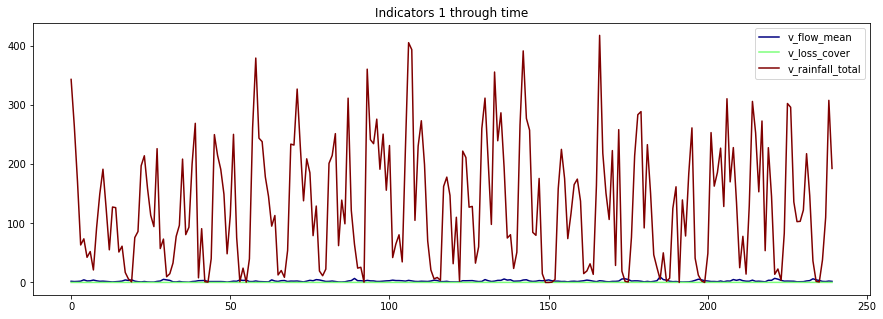

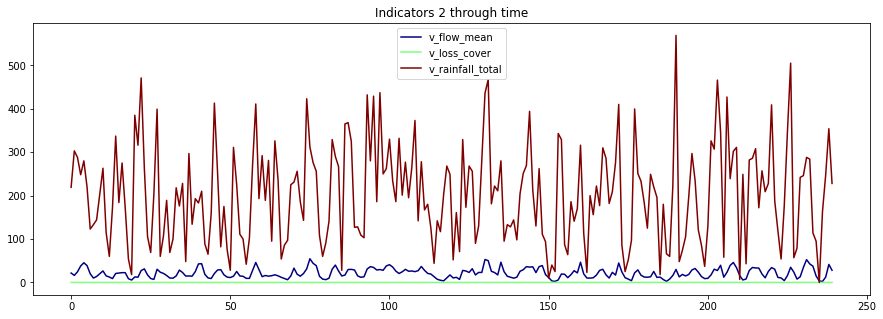

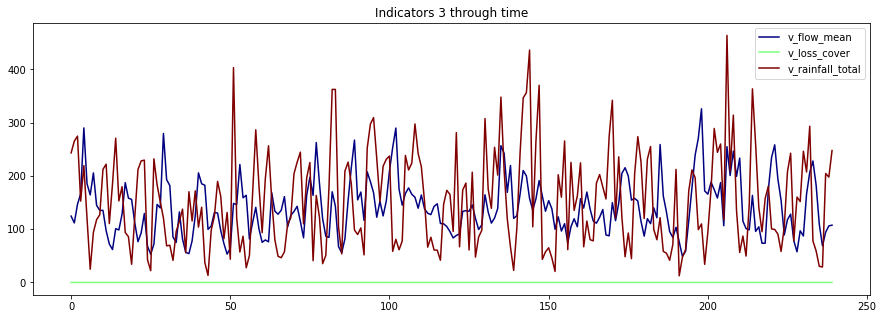

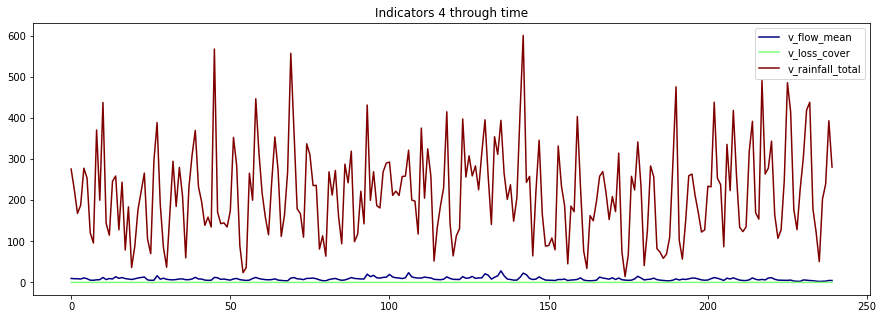

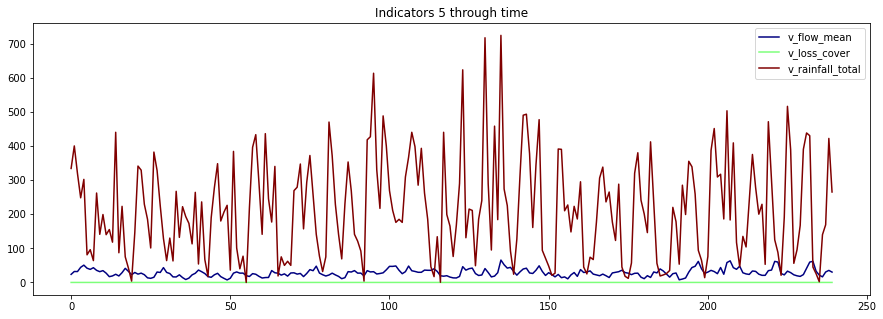

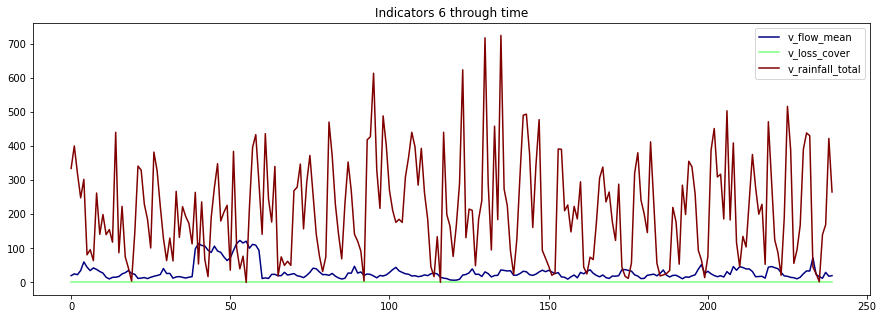

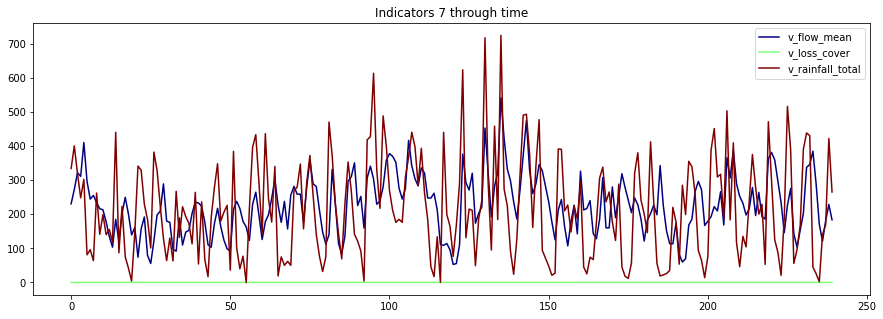

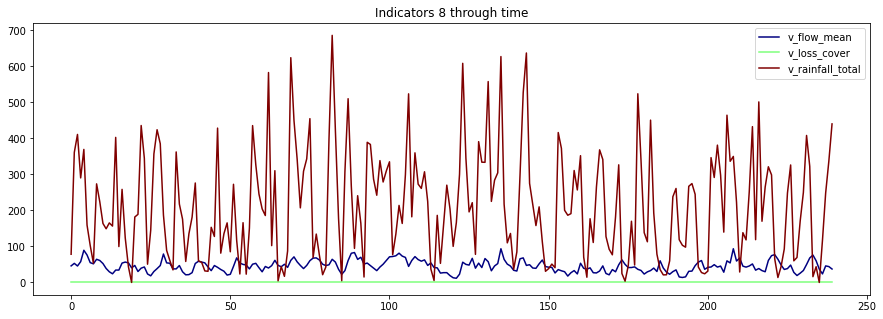

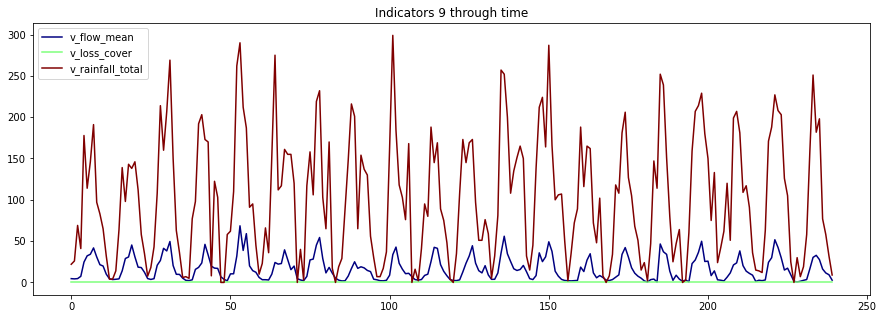

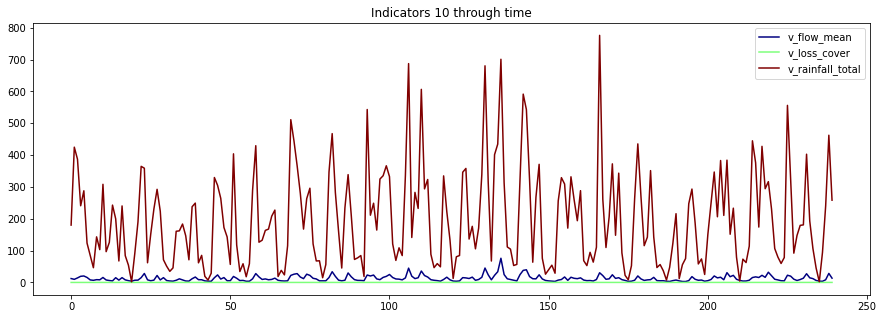

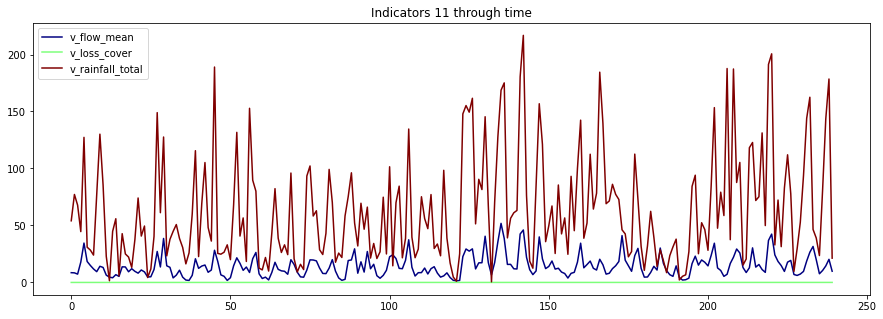

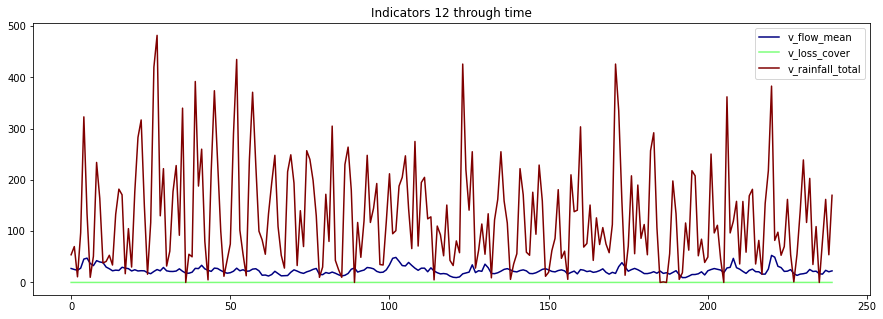

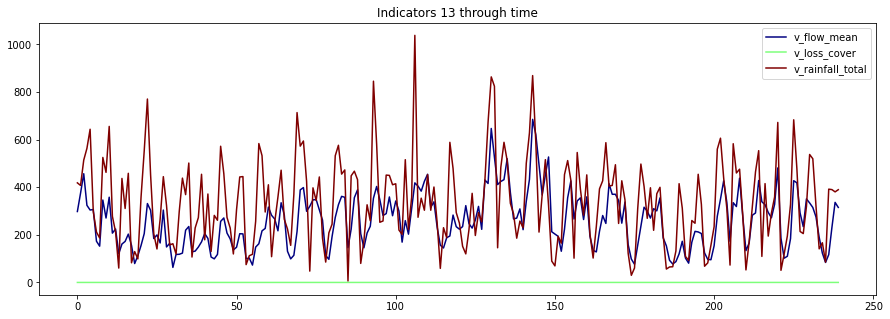

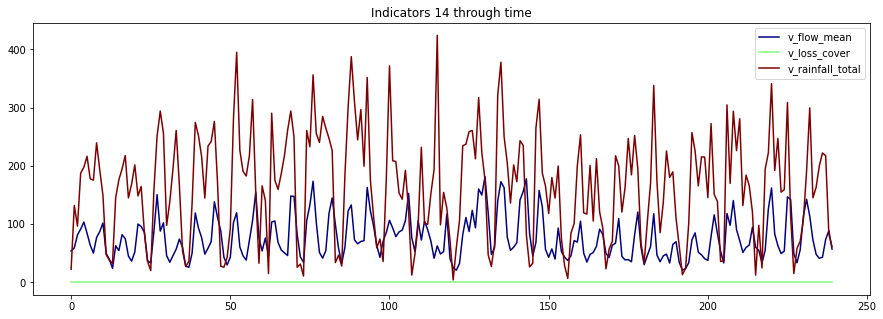

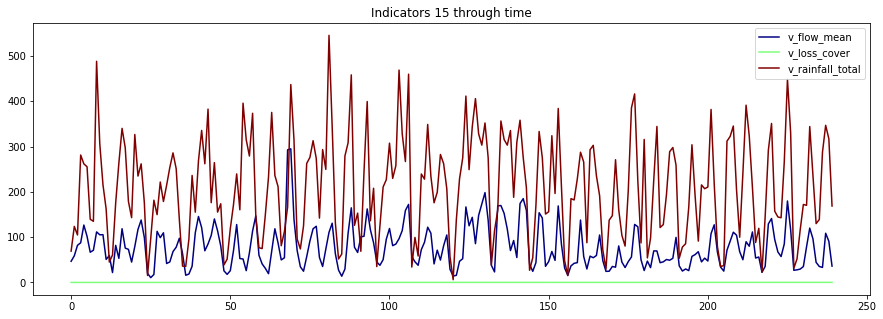

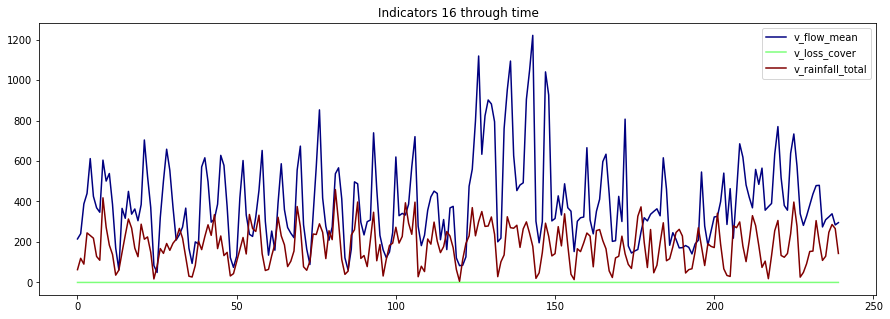

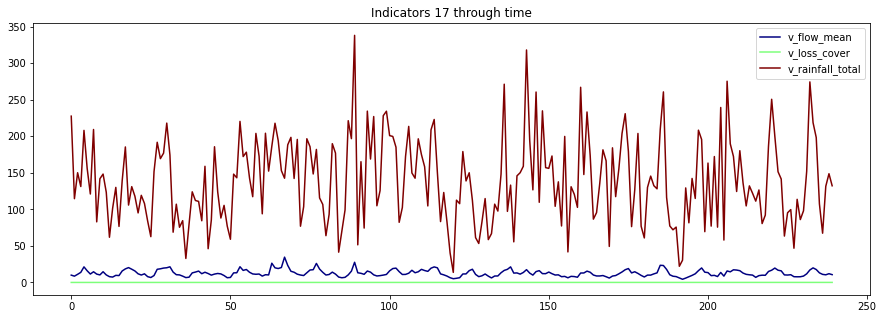

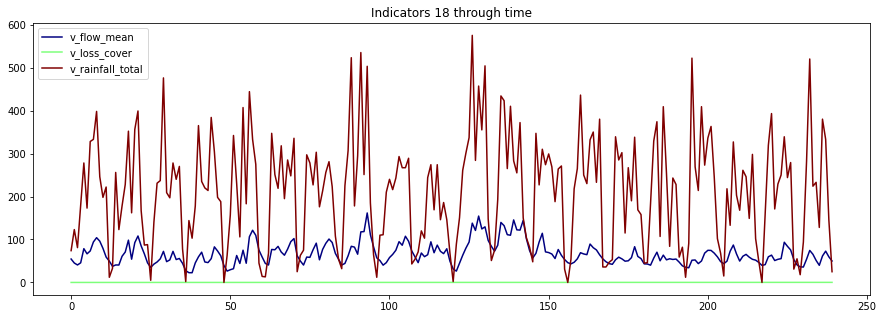

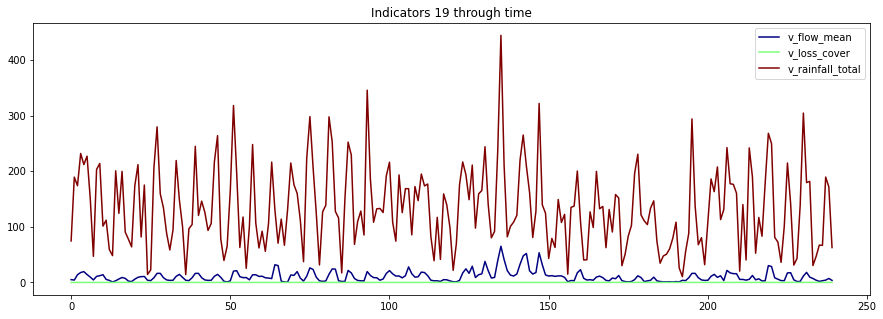

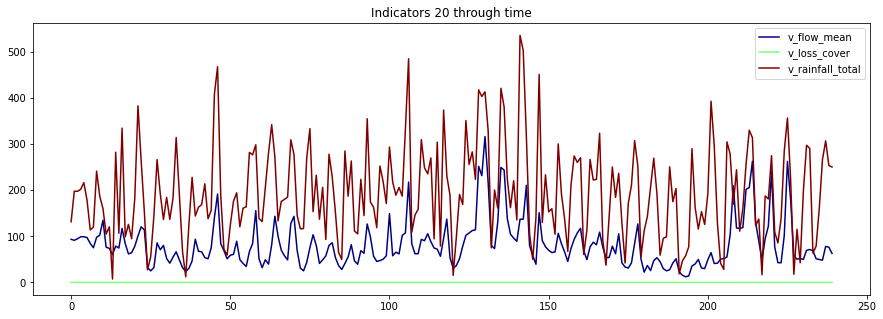

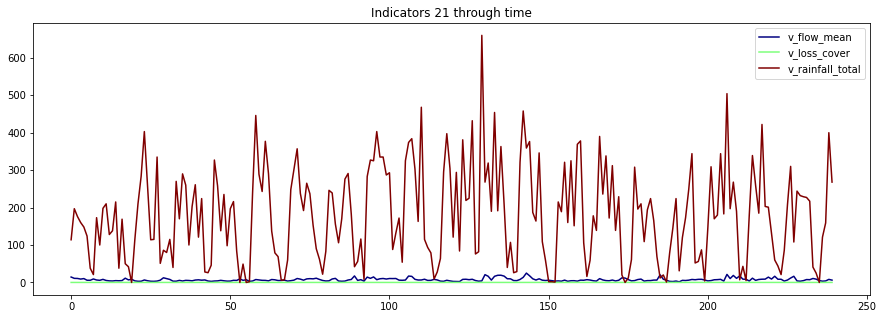

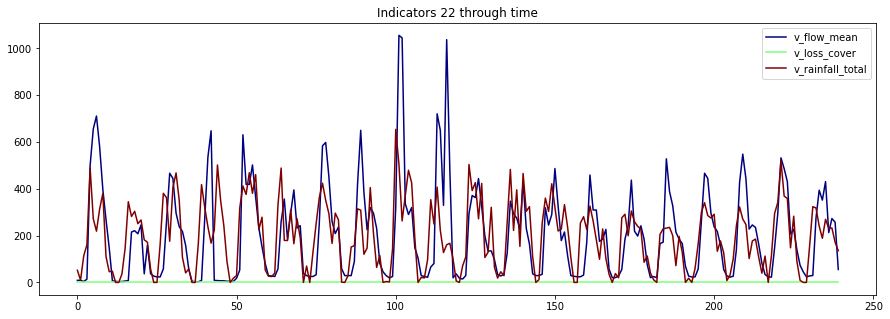

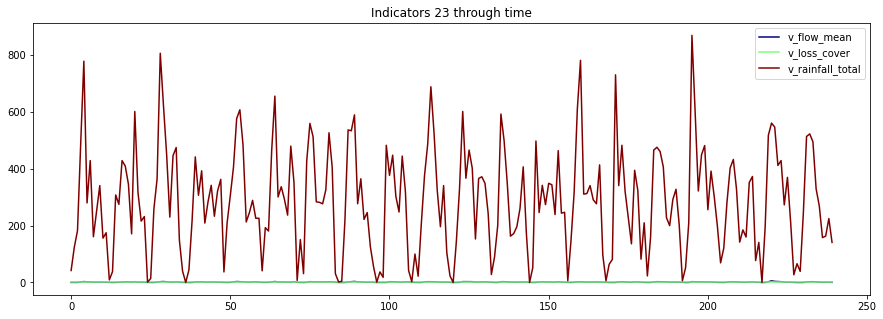

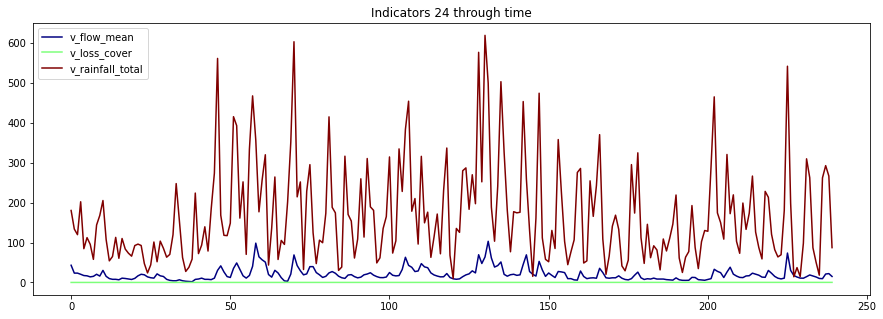

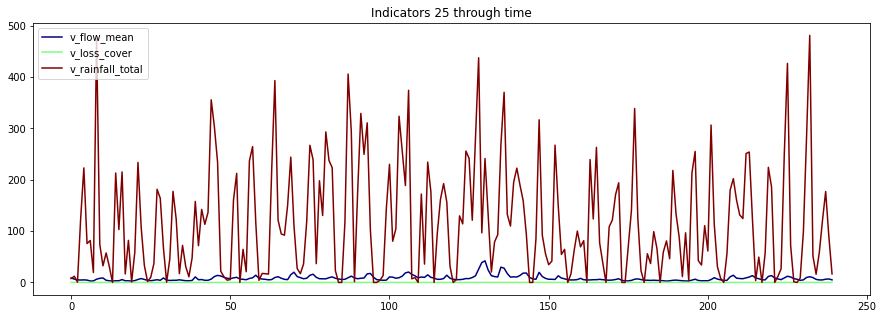

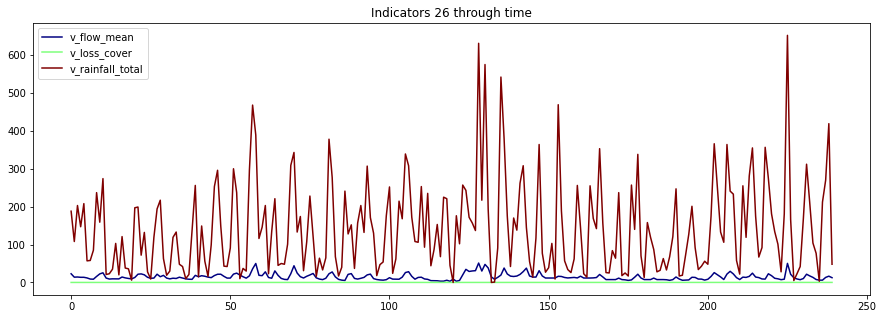

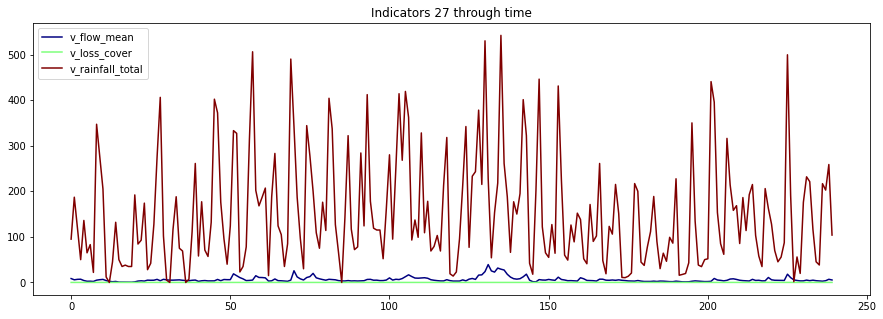

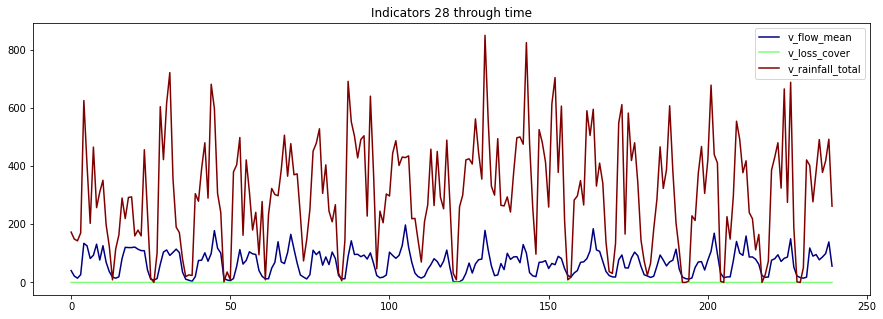

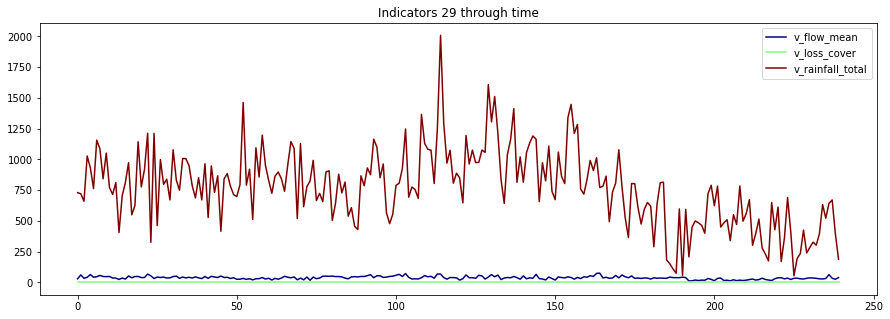

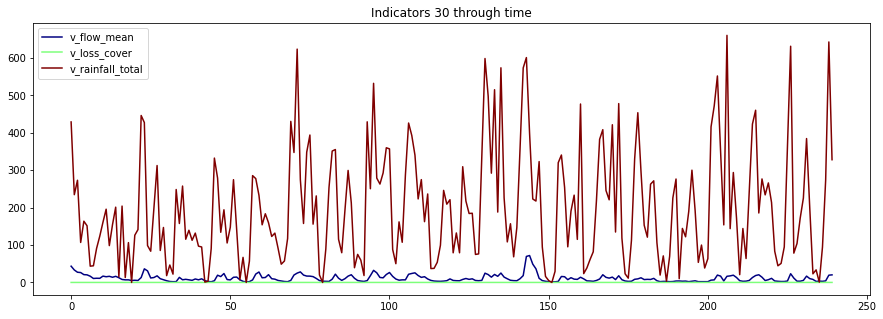

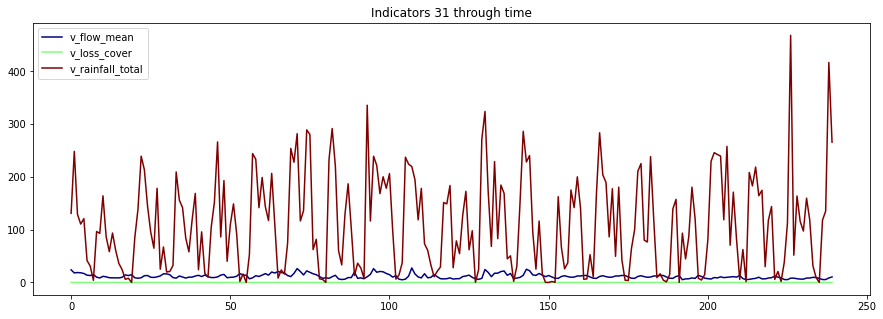

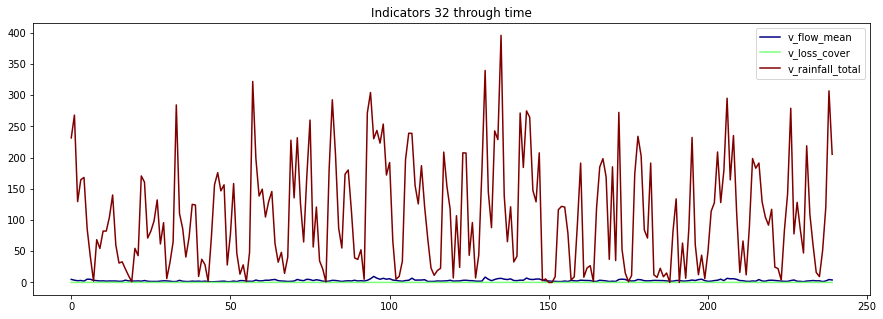

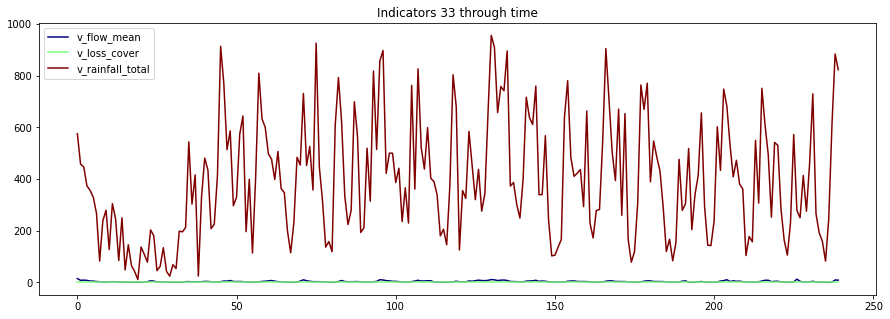

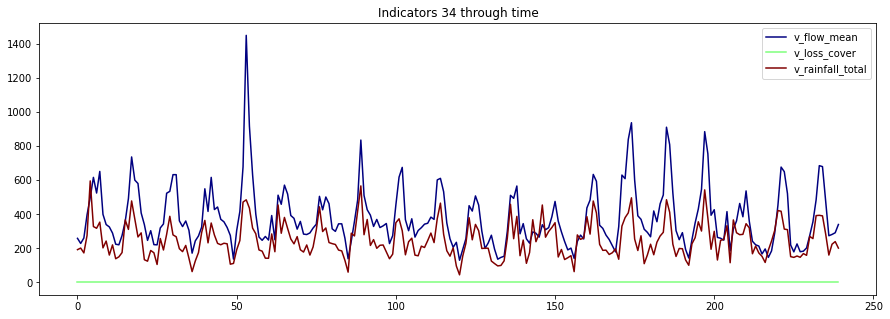

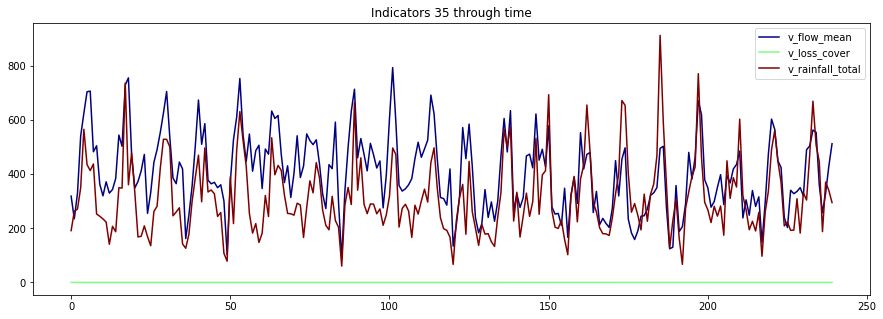

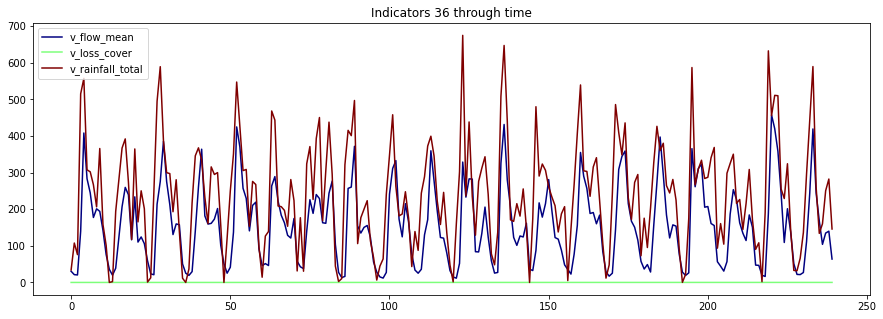

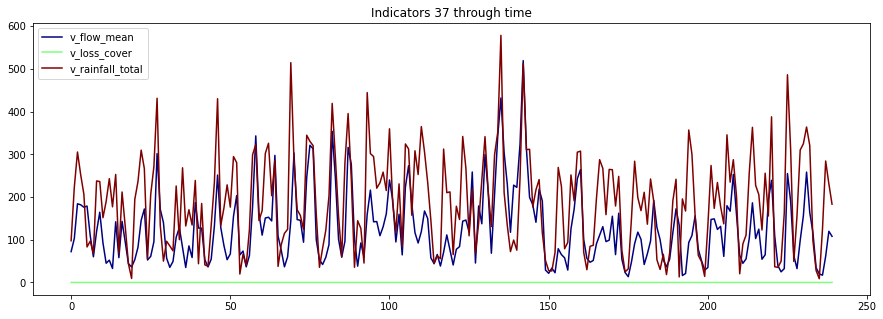

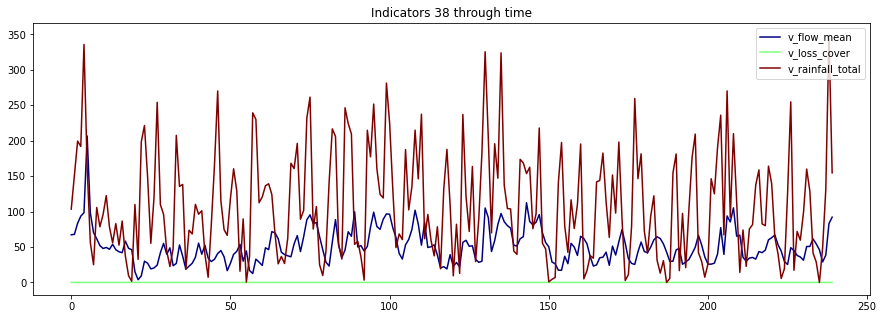

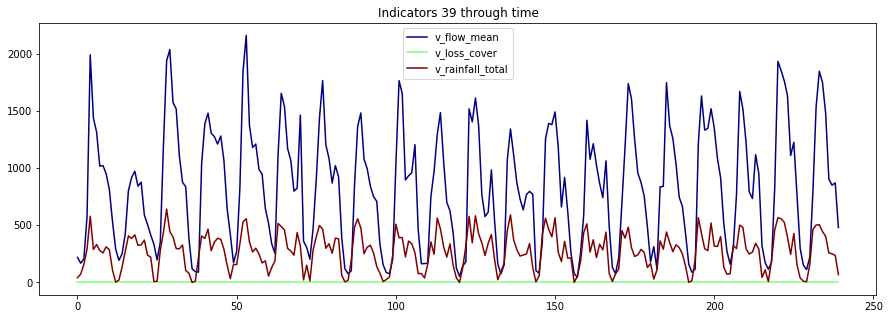

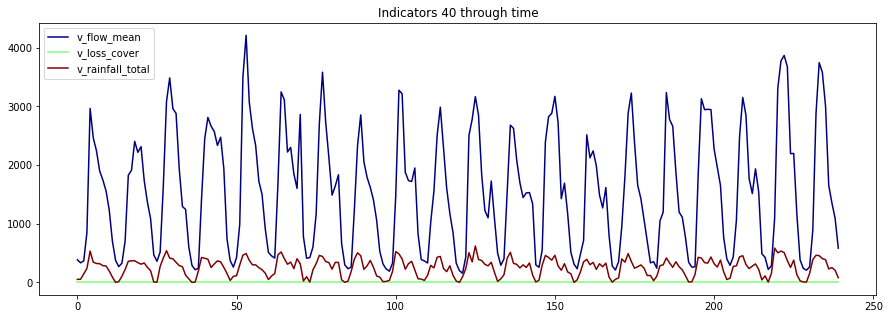

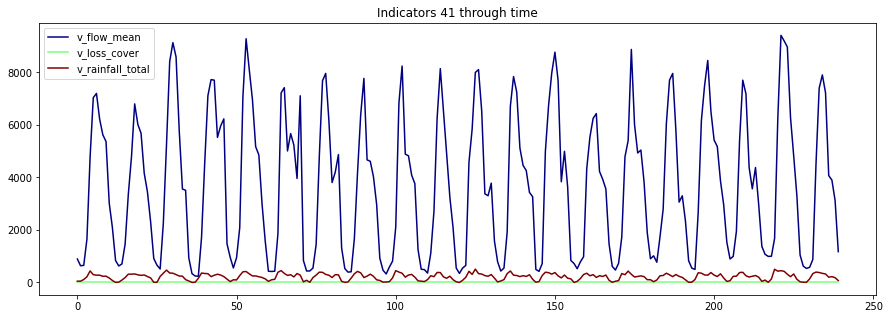

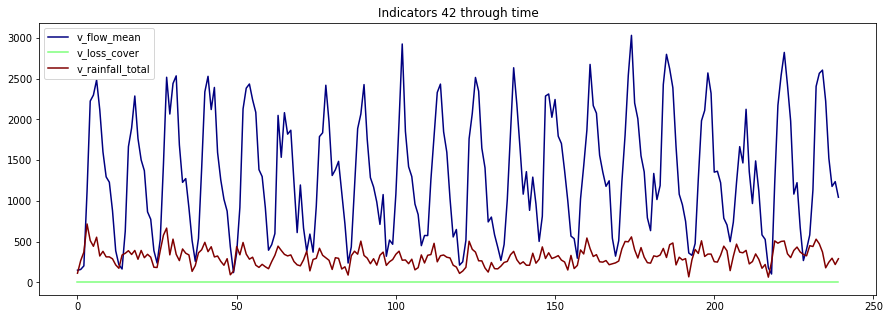

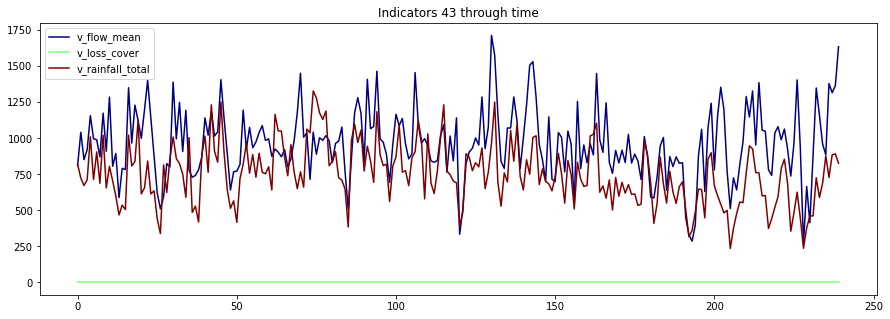

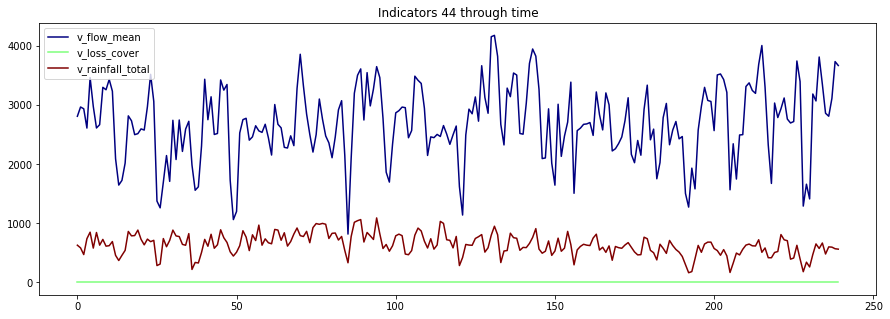

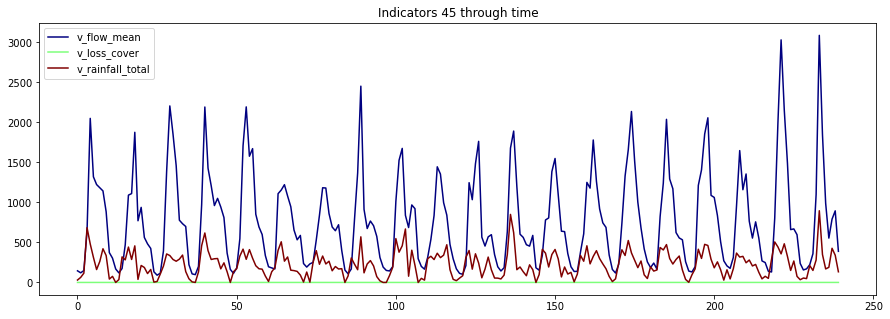

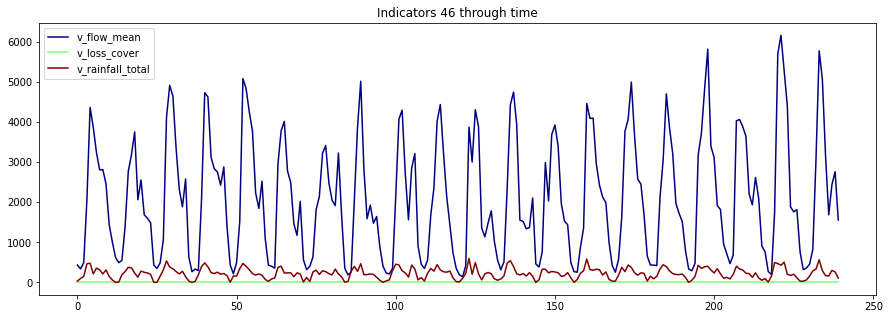

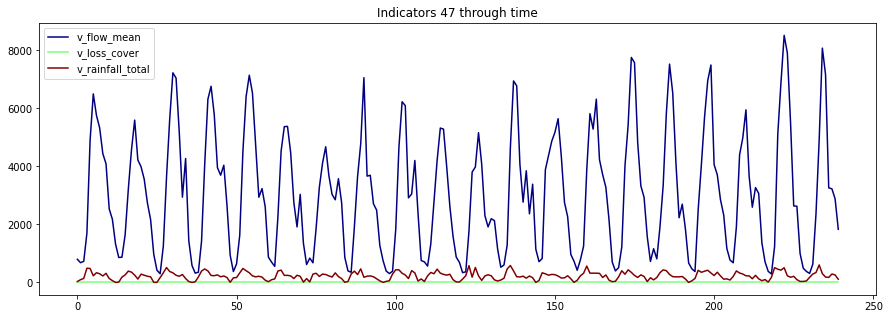

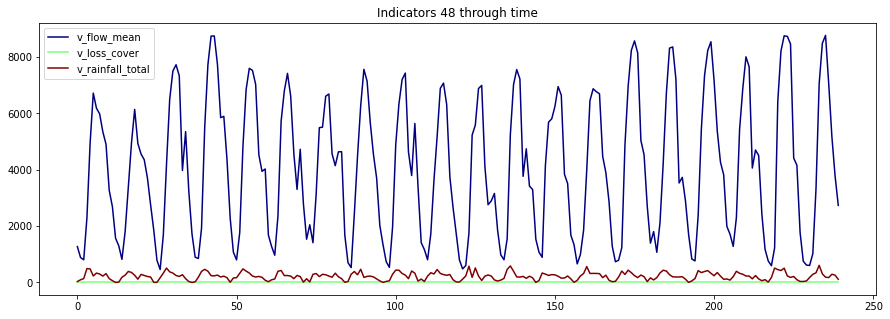

In [83]:
for i in mcs:
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_loss_cover', 
                                     'v_rainfall_total']].copy().reset_index(drop = True)
    fig, ax = plt.subplots(figsize=(15,5))
    main_title = 'Indicators ' + str(i) + ' through time'
    temp_df.plot(colormap = 'jet', title = main_title, ax = ax)
    plt.show()

### Granger's Causality Test

Causalidad de Wiener-Granger o Test de Wiener-Granger: Desarrollado por el Premio en Ciencias Económicas en memoria de Alfred Nobel (año 2003) Clive W. J. Granger (1934-2009), a partir de las indicaciones de Norbert Wiener. Es un test consistente en comprobar si los resultados de una variable sirven para predecir a otra variable, si tiene carácter unidireccional o bidireccional. Para ello se tiene que comparar y deducir si el comportamiento actual y el pasado de una serie temporal A predice la conducta de una serie temporal B. Si ocurre el hecho, se dice que “el resultado A” causa en el sentido de Wiener-Granger “el resultado B”; el comportamiento es unidireccional. Si sucede lo explicado e igualmente “el resultado B” predice “el resultado A”, el comportamiento es bidireccional, entonces “el resultado A” causa “el resultado B”, y “el resultado B” causa “el resultado A”. 

https://www.analyticslane.com/2019/11/18/test-de-causalidad-de-wiener-granger/

$H_0 $ : NO existe una relación entre las variables.

$H_a $ : SI existe una relación entre las variables.

Si p-value < $\alpha$ (0.05) se rechaza $H_0 $; lo que implica que SI hay relación entre las variables.

In [88]:
from statsmodels.tsa.stattools import grangercausalitytests

#### v_flow_mean vs v_loss_cover

In [196]:
for i in mcs:
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_loss_cover']].copy().reset_index(drop = True)
    
    print('MC = ', i)
    print('-------')
    granger_test = sm.tsa.stattools.grangercausalitytests(temp_df, maxlag = 12, 
                                                          verbose = True)
    granger_test
    print('\n')

MC =  1
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0901  , p=0.1496  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=2.1166  , p=0.1457  , df=1
likelihood ratio test: chi2=2.1073  , p=0.1466  , df=1
parameter F test:         F=2.0901  , p=0.1496  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7294  , p=0.1797  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=3.5330  , p=0.1709  , df=2
likelihood ratio test: chi2=3.5071  , p=0.1732  , df=2
parameter F test:         F=1.7294  , p=0.1797  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1409  , p=0.0958  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=6.6182  , p=0.0851  , df=3
likelihood ratio test: chi2=6.5275  , p=0.0886  , df=3
parameter F test:         F=2.1409  , p=0.0958  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.87

#### v_flow_mean vs v_rainfall_total

In [197]:
for i in mcs:
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_rainfall_total']].copy().reset_index(drop = True)
    
    print('MC = ', i)
    print('-------')
    granger_test = sm.tsa.stattools.grangercausalitytests(temp_df, maxlag = 12, 
                                                          verbose = True)
    granger_test
    print('\n')

MC =  1
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0368  , p=0.8481  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=0.0372  , p=0.8470  , df=1
likelihood ratio test: chi2=0.0372  , p=0.8470  , df=1
parameter F test:         F=0.0368  , p=0.8481  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7618  , p=0.4680  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=1.5563  , p=0.4593  , df=2
likelihood ratio test: chi2=1.5512  , p=0.4604  , df=2
parameter F test:         F=0.7618  , p=0.4680  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6692  , p=0.5717  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=2.0687  , p=0.5583  , df=3
likelihood ratio test: chi2=2.0597  , p=0.5601  , df=3
parameter F test:         F=0.6692  , p=0.5717  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.14

### Split data for machine learning algorithms

In [137]:
from sklearn.model_selection import train_test_split

temp_df = data.copy()

data_train = pd.DataFrame()
data_test = pd.DataFrame()

for i in mcs:
    #train, test = train_test_split(temp_df[temp_df['mc'] == i], test_size = 0.2)
    nobs = 48 # 20% de 240
    train, test = temp_df[temp_df['mc'] == i].iloc[0:-nobs], temp_df[temp_df['mc'] == i].iloc[-nobs:]
    data_train = pd.concat([data_train, train], axis = 0)
    data_test = pd.concat([data_test, test], axis = 0)

print('data')
print('----------')
print(data.shape)
print(data.dtypes)
print()
print('data_train')
print('----------')
print(data_train.shape)
print(data_train.dtypes)
print()
print('data_test')
print('---------')
print(data_test.shape)
print(data_test.dtypes)

temp_df.head(10)

data
----------
(11520, 4)
mc                    int64
v_flow_mean         float64
v_loss_cover        float64
v_rainfall_total    float64
dtype: object

data_train
----------
(9216, 4)
mc                    int64
v_flow_mean         float64
v_loss_cover        float64
v_rainfall_total    float64
dtype: object

data_test
---------
(2304, 4)
mc                    int64
v_flow_mean         float64
v_loss_cover        float64
v_rainfall_total    float64
dtype: object


mc  v_flow_mean  v_loss_cover  v_rainfall_total
0   1        1.940      0.000000        343.527950
1   1        1.500      0.000552        264.722268
2   1        1.720      0.001105        170.728482
3   1        2.160      0.001657         63.436557
4   1        4.410      0.002210         73.772848
5   1        2.545      0.002762         42.536823
6   1        2.720      0.003314         52.253772
7   1        4.030      0.003867         21.126886
8   1        2.730      0.004419         92.401064
9   1        1.940      0.004972        149.583849

### Stationarity check

Non-stationary data, as a rule, are unpredictable and cannot be modeled or forecasted. The results obtained by using non-stationary time series may be spurious in that they may indicate a relationship between two variables where one does not exist. In order to receive consistent, reliable results, the non-stationary data needs to be transformed into stationary data. In contrast to the non-stationary process that has a variable variance and a mean that does not remain near, or returns to a long-run mean over time, the stationary process reverts around a constant long-term mean and has a constant variance independent of time. 

https://www.investopedia.com/articles/trading/07/stationary.asp


**Augmented Dickey-Fuller Test (ADF) Statistical Test**

To determine if a time series is stationary or not, we will use the ADF test which is a type of unit root test. Unit roots are a cause for non-stationarity, the ADF test will test if unit root is present.

    A time series is stationary if a single shift in time doesn’t change the time series statistical properties, in which case unit root does not exist.

The Null and Alternate hypothesis of the Augmented Dickey-Fuller test is defined as follows:

    $H_0$ : Null Hypothesis states there is the presence of a unit root.
    $H_0$ : Alternate Hypothesis states there is no unit root. In other words, Stationarity exists.

In [157]:
# Augmented Dickey-Fuller Test (ADF Test)/unit root test

from statsmodels.tsa.stattools import adfuller

def adf_test(ts, ts_name, signif = 0.05):
    dftest = adfuller(ts, autolag = 'AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']    
    
    stationary = 0
    
    if p <= signif:
        print(' >>> ', ts_name, 'series is Stationary')
        stationary = 1
    else:
        print(' >>> ', ts_name, 'series is Non-Stationary')
        stationary = 0
    
    print('Size : ', ts.shape)
    print()
    
    return(stationary)

list_stationary = []
    
for i in mcs:
    #temp_df1 = data_train[data_train['mc'] == i][['v_flow_mean']].copy().reset_index(drop = True)
    #temp_df2 = data_train[data_train['mc'] == i][['v_rainfall_total']].copy().reset_index(drop = True)
    #temp_df3 = data_train[data_train['mc'] == i][['v_loss_cover']].copy().reset_index(drop = True)

    temp_df1 = data[data['mc'] == i][['v_flow_mean']].copy().reset_index(drop = True)
    temp_df2 = data[data['mc'] == i][['v_rainfall_total']].copy().reset_index(drop = True)
    temp_df3 = data[data['mc'] == i][['v_loss_cover']].copy().reset_index(drop = True)

    
    print('MC = ', i)
    print('--------------------------------------', '\n')

    #apply adf test on the series
    stationary = adf_test(temp_df1, 'v_flow_mean')
    list_stationary.append([i, 'v_flow_mean', stationary])
    
    stationary = adf_test(temp_df2, 'v_rainfall_total')
    list_stationary.append([i, 'v_rainfall_total', stationary])
    
    stationary = adf_test(temp_df3, 'v_loss_cover')
    list_stationary.append([i, 'v_loss_cover', stationary])
    
    print('\n')

data_train_stationary = pd.DataFrame(list_stationary)
data_train_stationary.columns = ['mc', 'variable', 'stationary']
data_train_stationary = data_train_stationary.set_index(['mc', 'variable', ]).unstack().swaplevel(0, axis = 1).sort_index(axis = 1)

data_train_stationary.head(48)

MC =  1
-------------------------------------- 

Test Statistic           -2.633280
p-value                   0.086312
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_flow_mean series is Non-Stationary
Size :  (240, 1)

Test Statistic           -3.669920
p-value                   0.004557
# Lags                   14.000000
# Observations          225.000000
Critical Value (1%)      -3.459752
Critical Value (5%)      -2.874473
Critical Value (10%)     -2.573663
dtype: float64
 >>>  v_rainfall_total series is Stationary
Size :  (240, 1)

Test Statistic           -1.037547
p-value                   0.739325
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_loss_cover series is Non-Stationary
Size

variable v_flow_mean v_loss_cover v_rainfall_total
          stationary   stationary       stationary
mc                                                
1                  0            0                1
2                  1            0                1
3                  1            0                1
4                  0            0                1
5                  0            0                0
6                  1            0                0
7                  1            0                0
8                  1            0                1
9                  1            0                1
10                 1            0                1
11                 1            0                0
12                 1            0                1
13                 0            0                1
14                 1            0                0
15                 1            0                1
16                 1            0                1
17                 1            0                1
18                 0            0                1
19                 1            0                1
20                 1            0                0
21                 1            0                1
22                 1            0                1
23                 1            0                1
24                 1            0                1
25                 1            0                1
26                 1            0                0
27                 1            0                1
28                 1            0                1
29                 1            0                0
30                 1            0                1
31                 1            0                1
32                 1            0                1
33                 1            0                1
34                 0            0                1
35                 0            0                0
36                 1            0                1
37                 1            0                0
38                 1            0                1
39                 1            0                1
40                 1            0                1
41                 1            0                1
42                 1            0                0
43                 1            0                0
44                 1            0                0
45                 1            0                1
46                 1            0                1
47                 0            0                1
48                 0            0                1

### Make data stationery 

http://finanzaszone.com/analisis-y-prediccion-de-series-temporales-con-r-ii-estacionariedad-y-raices-unitarias/

In [206]:
# 1st difference
# df_differenced = df_train.diff().dropna()
# stationarity test again with differenced data
# adf_test(df_differenced["realgdp"])

def ts_difference(mc, dataframe, variable, nro_difference):
    temp_df = dataframe[(dataframe['mc'] == mc)][variable].copy().reset_index(drop = True)
    
    print('MC = ', mc, ' variable = ', variable, ' diff = ', nro_difference)
    print('-------------------------------------------')
    
    df_differenced = temp_df.diff(nro_difference).dropna()
    stationary = adf_test(df_differenced, variable)
    
    return(df_differenced)

mc = 10
variable = 'v_flow_mean'
data_to_analice = data.copy()
nro_dif_to_apply = 1

temp_df_diff = ts_difference(mc, data_to_analice, variable, nro_dif_to_apply)

temp_df = data_to_analice[(data_to_analice['mc'] == mc)][variable].copy().reset_index(drop = True)

print('Original : \n', temp_df.describe(), '\n')
print('Original : \n', temp_df.head(10), '\n')

print('Modificada : \n', temp_df_diff.describe())
print('Modificada : \n', temp_df_diff.head(10), '\n')


MC =  10  variable =  v_flow_mean  diff =  1
-------------------------------------------
Test Statistic           -5.616790
p-value                   0.000001
# Lags                   12.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_flow_mean series is Stationary
Size :  (239,)

Original : 
 count    240.000000
mean      12.707105
std        9.173464
min        2.887500
25%        6.239625
50%        9.792812
75%       16.393984
max       75.990000
Name: v_flow_mean, dtype: float64 

Original : 
 0    12.20
1     9.75
2    14.20
3    19.30
4    20.30
5    15.70
6     7.90
7     6.70
8     8.75
9     8.30
Name: v_flow_mean, dtype: float64 

Modificada : 
 count    239.000000
mean       0.005280
std        9.734810
min      -51.270000
25%       -4.634250
50%       -0.660000
75%        4.136323
max       42.330000
Name: v_flow_mean, dtype: float64
Modificada : 
 1   

### Modeling

In [ ]:
# model fitting
model = VAR(df_differenced)
results = model.fit(maxlags=15, ic='aic')
results.summary()

### Forecasting

In [ ]:
# forecasting
lag_order = results.k_ar
results.forecast(df.values[-lag_order:], 5)

### Plotting

In [ ]:
# plotting
results.plot_forecast(20)

### Evaluating

In [ ]:
# Evaluation
fevd = results.fevd(5)
fevd.summary()

### Inverting forecast results

In [ ]:
# forecasting
pred = results.forecast(results.y, steps=nobs)
df_forecast = pd.DataFrame(pred, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast.tail()

# inverting transformation
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

# show inverted results in a dataframe
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['realgdp_forecast', 'realcons_forecast']]